In [87]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, rand_score
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
boston_dataset = load_boston()

d:\Py311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~

In [89]:
mainDF=pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
mainDF['PRICE'] = boston_dataset.target

In [90]:
mainDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


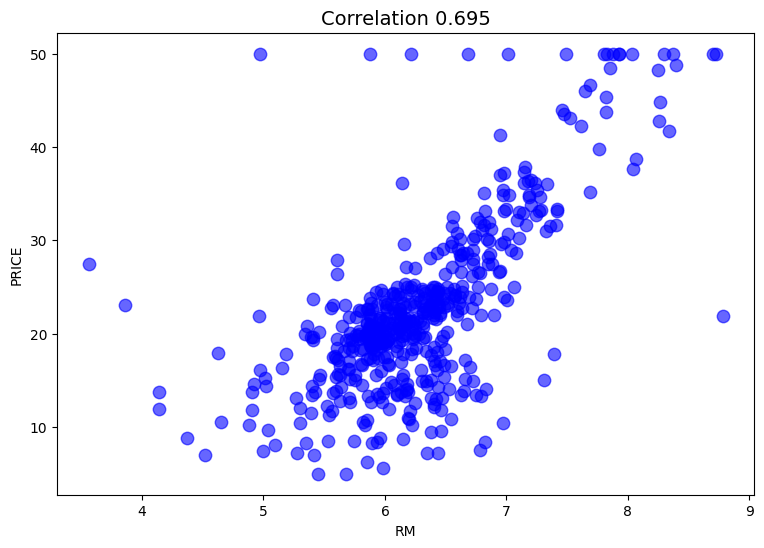

In [91]:
rm_tgt_corr=round(mainDF['RM'].corr(mainDF['PRICE']), 3)
plt.figure(figsize=(9,6))
plt.scatter(x=mainDF['RM'], y=mainDF['PRICE'], alpha=0.6, s=80, color='blue')
plt.title(f'Correlation {rm_tgt_corr}', fontsize=14)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

In [92]:
prices = mainDF['PRICE']
features = mainDF.drop('PRICE', axis=1)

In [93]:
prices = mainDF['PRICE']
features = mainDF.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data 0.750121534530608
Test data r-squared:  0.6709339839115631
Intercepr 36.53305138282431


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [94]:
mainDF['PRICE'].skew()
mainDF['PRICE'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64>

In [95]:
y_log = np.log(mainDF['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [96]:
y_log.skew()

-0.33032129530987864

In [97]:
prices = np.log(mainDF['PRICE'])
feautures = mainDF.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data', regr.score(X_train, y_train))
print('Test data r-squared: ', regr.score(X_test, y_test))

print('Intercepr', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data 0.7930234826697583
Test data r-squared:  0.7446922306260734
Intercepr 4.059943871775196


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [98]:
pred = regr.predict(X_test)

In [99]:
print('mean_squared_error : ', mean_squared_error(y_test, pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, pred))

mean_squared_error :  0.042600946922013855
mean_absolute_error :  0.14142281780478574


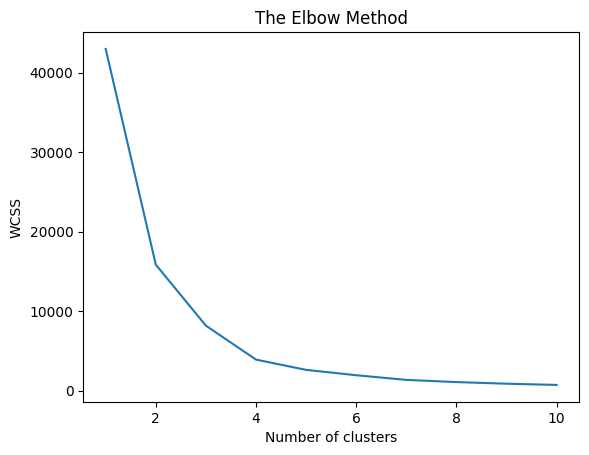

In [100]:
X = pd.DataFrame({'PRICE':mainDF['PRICE'], 'RM':mainDF['RM']})

X = np.array(X, dtype=float)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

df2 = mainDF
y_kmeans_list = list(y_kmeans)

for i in range(len(y_kmeans_list)):
    y_kmeans_list[i] += 1

tmp = list(mainDF.iloc[:, 6].values)
k = 0
clusters = []

for i in range(len(tmp)):
    clusters.append(y_kmeans_list[k])
    k += 1

true_clusters = []
pricesT = list(df2['PRICE'])

for i in range(len(pricesT)):
    if float(pricesT[i]) < 21.6:
        true_clusters.append(2)
    else:
        true_clusters.append(1)

df2['Cluster'] = clusters
df2['True cluster'] = true_clusters
df2.to_excel('cluster.xlsx')
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Cluster,True cluster
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2,1


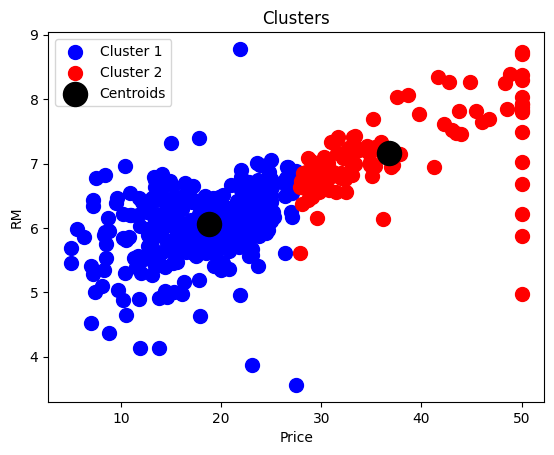

In [102]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')

plt.title('Clusters')
plt.xlabel('Price')
plt.ylabel('RM')
plt.legend()

plt.show()

In [103]:
X_old = mainDF.iloc[:, [6, 6]].values
for i in range(len(X_old)):
    if X_old[i][1] < 7.185:
        X_old[i] = 0
X = []
for i in range(len(X_old)):
    if sum(X_old[i]) == 0:
        pass
    elif sum(X_old[i]) > 0:
        X.append([X_old[i][0], X_old[i][1]])
X = np.array(X, dtype=float)

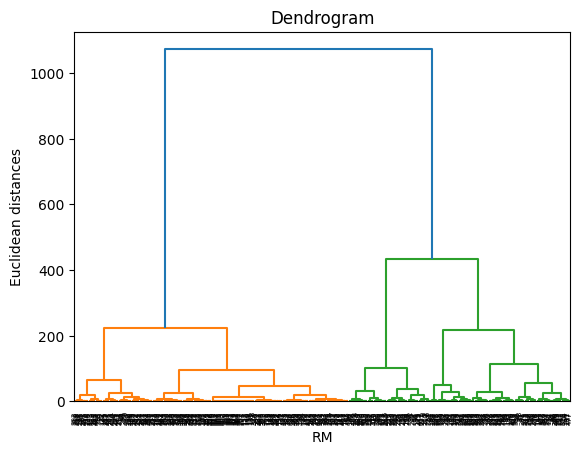

In [104]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('RM')
plt.ylabel('Euclidean distances')
plt.show()